In [53]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
minutes = '10'
# Read game data
# keep_default_na=False because the NA region is translated into NaN
game_data = pd.read_csv('gameData_' + minutes + 'Minutes.csv',keep_default_na=False)
print game_data.columns

Index([u'matchId', u'matchVersion', u'region', u'queueType', u'matchCreation',
       u'matchDuration', u'winner', u'blueGold', u'redGold', u'blueDragons',
       u'blueRiftHerald', u'redDragons', u'redRiftHerald', u'blueWards',
       u'redWards', u'blueDestroyedWards', u'redDestroyedWards',
       u'blueTopTurrets', u'blueMidTurrets', u'blueBotTurrets',
       u'redTopTurrets', u'redMidTurrets', u'redBotTurrets', u'blueInhibitor',
       u'redInhibitor', u'blueKills', u'blueAssists', u'redKills',
       u'redAssists', u'blueCs', u'blueJg', u'blueXp', u'redCs', u'redJg',
       u'redXp'],
      dtype='object')


In [55]:
# Basic Statistics rewarding games
games_na = len(game_data[game_data['region']=='NA'])
games_euw = len(game_data[game_data['region']=='EUW'])
games_las = len(game_data[game_data['region']=='LAS'])
games_kr = len(game_data[game_data['region']=='KR'])
blue_wins_na = len(game_data[(game_data['winner']==100) & (game_data['region']=='NA')])
blue_wins_euw = len(game_data[(game_data['winner']==100) & (game_data['region']=='LAS')])
blue_wins_las = len(game_data[(game_data['winner']==100) & (game_data['region']=='EUW')])
blue_wins_kr = len(game_data[(game_data['winner']==100) & (game_data['region']=='KR')])

print 'Overall games: {}'.format(len(game_data))
print 'Overall Blue winrate: {:.2f}%'.format(float(len(game_data[game_data['winner']==100]))/len(game_data)*100)
print 'NA games: {}'.format(games_na)
print 'NA Blue winrate: {:.2f}%'.format(float(blue_wins_na)/games_na*100)
print 'EUW games: {}'.format(games_euw)
print 'EUW Blue winrate: {:.2f}%'.format(float(blue_wins_euw)/games_euw*100)
print 'LAS games: {}'.format(games_las)
print 'LAS Blue winrate: {:.2f}%'.format(float(blue_wins_las)/games_las*100)
print 'KR games: {}'.format(games_kr)
print 'KR Blue winrate: {:.2f}%'.format(float(blue_wins_kr)/games_kr*100)



Overall games: 86540
Overall Blue winrate: 49.68%
NA games: 21824
NA Blue winrate: 49.57%
EUW games: 22960
EUW Blue winrate: 49.24%
LAS games: 22775
LAS Blue winrate: 50.22%
KR games: 18981
KR Blue winrate: 49.70%


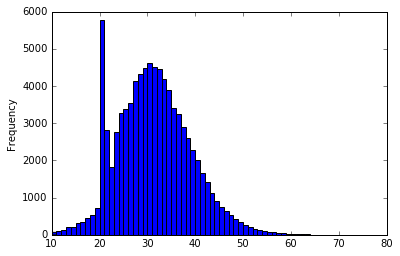

In [56]:
game_data['matchDuration'].plot.hist(bins=game_data['matchDuration'].max()-game_data['matchDuration'].min())

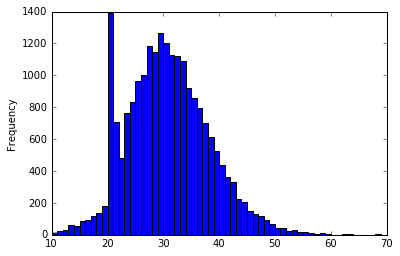

In [57]:
game_data[game_data['region']=='NA']['matchDuration'].plot.hist(bins=game_data[game_data['region']=='NA']['matchDuration'].max()-
                                                                 game_data[game_data['region']=='NA']['matchDuration'].min())

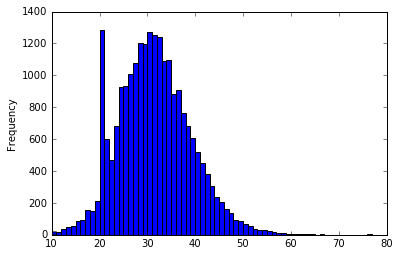

In [58]:
game_data[game_data['region']=='EUW']['matchDuration'].plot.hist(bins=game_data[game_data['region']=='EUW']['matchDuration'].max()-
                                                                 game_data[game_data['region']=='EUW']['matchDuration'].min())

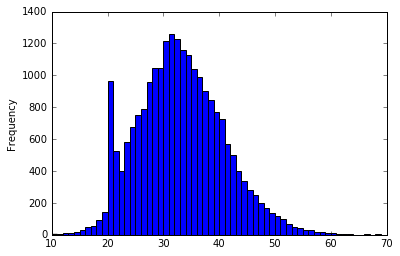

In [59]:
game_data[game_data['region']=='LAS']['matchDuration'].plot.hist(bins=game_data[game_data['region']=='LAS']['matchDuration'].max()-
                                                                 game_data[game_data['region']=='LAS']['matchDuration'].min())

In [60]:
def comparison_by_winner(variable,game_data, minutes):
    overall = game_data[variable].as_matrix()
    blue_win = game_data[game_data['winner']==100][variable].as_matrix()
    red_win = game_data[game_data['winner']==200][variable].as_matrix()
    data_to_plot = [overall,blue_win,red_win]
    
    plt.boxplot(data_to_plot)
    plt.xticks([1, 2, 3], ['Overall', 'Blue Win', 'Red Win'])
    plt.title(variable + ' at ' + minutes + ' Minutes')
    plt.xlabel('Scenario')
    plt.ylabel(variable) 

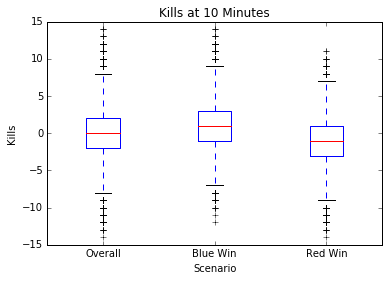

In [61]:
comparison_by_winner('Kills',game_data,minutes)

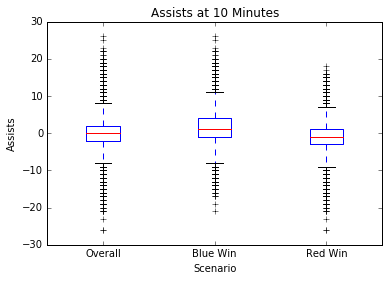

In [62]:
comparison_by_winner('Assists',game_data,minutes)

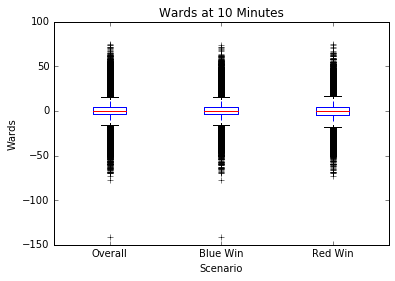

In [63]:
comparison_by_winner('Wards',game_data,minutes)

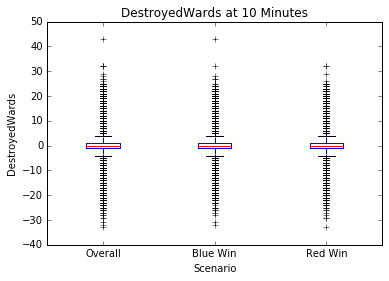

In [64]:
comparison_by_winner('DestroyedWards',game_data,minutes)

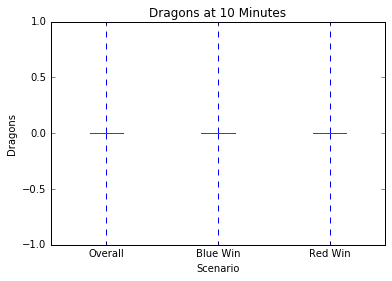

In [65]:
comparison_by_winner('Dragons',game_data,minutes)

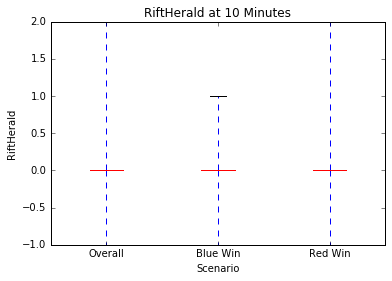

In [66]:
comparison_by_winner('RiftHerald',game_data,minutes)

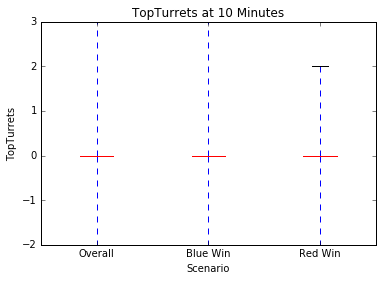

In [67]:
comparison_by_winner('TopTurrets',game_data,minutes)


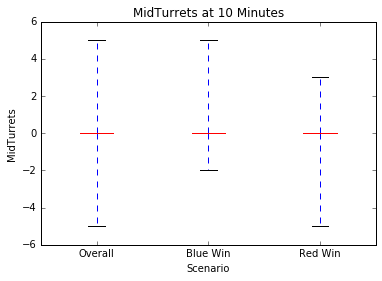

In [68]:
comparison_by_winner('MidTurrets',game_data,minutes)

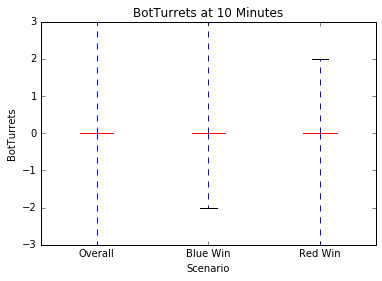

In [69]:
comparison_by_winner('BotTurrets',game_data,minutes)

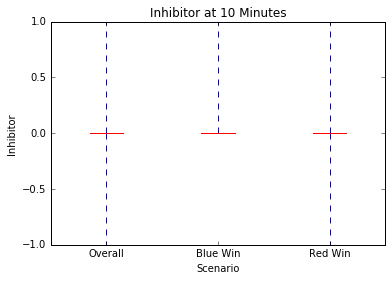

In [70]:
comparison_by_winner('Inhibitor',game_data,minutes)

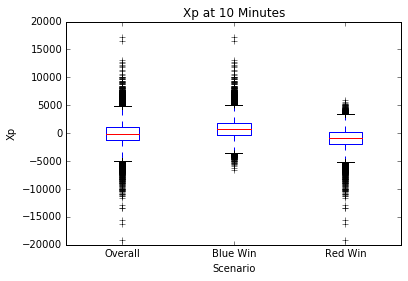

In [71]:
comparison_by_winner('Xp',game_data,minutes)

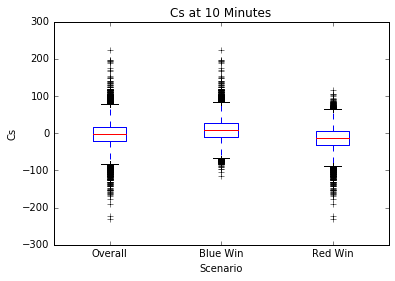

In [72]:
comparison_by_winner('Cs',game_data,minutes)

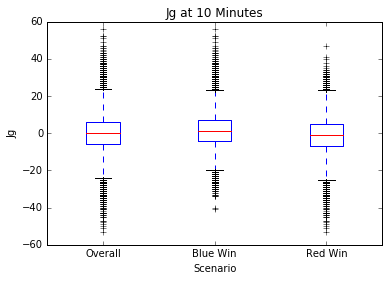

In [73]:
comparison_by_winner('Jg',game_data,minutes)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


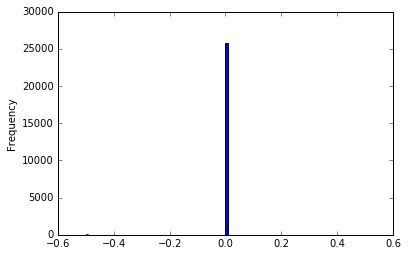

In [81]:
naive_errorBlue = game_data[(game_data['blueGold']>game_data['redGold'])][game_data['winner']==200]
naive_errorRed  = game_data[(game_data['blueGold']<game_data['redGold'])][game_data['winner']==100]
naive_error = pd.concat([naive_errorBlue,naive_errorRed])
naive_error.ix[naive_error.winner==200,'goldDiff']= naive_error['blueGold'] - naive_error['redGold']
naive_error.ix[naive_error.winner==100,'goldDiff']= naive_error['redGold'] - naive_error['blueGold']
naive_error['color'] = 'red'
naive_error['goldDiff'].plot.hist(bins=100)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


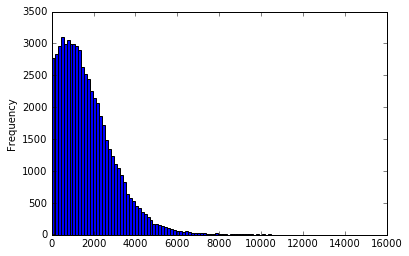

In [85]:
naive_accuBlue = game_data[(game_data['blueGold']>game_data['redGold'])][game_data['winner']==100]
naive_accuRed  = game_data[(game_data['blueGold']<game_data['redGold'])][game_data['winner']==200]
naive_accu = pd.concat([naive_accuBlue,naive_accuRed])
naive_accu.ix[naive_accu.winner==100,'goldDiff']= naive_accu['blueGold'] - naive_accu['redGold']
naive_accu.ix[naive_accu.winner==200,'goldDiff']= naive_accu['redGold'] - naive_accu['blueGold']
naive_accu['color'] = 'green'
naive_accu['goldDiff'].plot.hist(bins=100)

In [86]:
naive = pd.concat([naive_error,naive_accu])

In [90]:
naive_accu['goldDiffneg'] = naive_accu['goldDiff']*-1

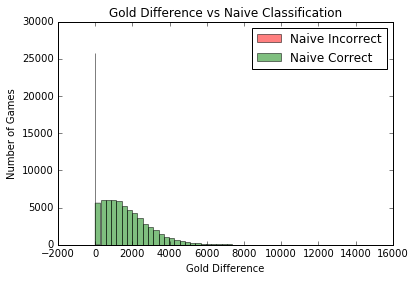

In [91]:
bins = np.linspace(0, 100, 7000)
plt.hist(naive_error['goldDiff'].values,bins=50,alpha=0.5, color='red',label='Naive Incorrect')
plt.hist(naive_accu['goldDiff'].values, bins=50,alpha=0.5, color='green',label='Naive Correct')
plt.legend(loc='upper right')
plt.title('Gold Difference vs Naive Classification')
plt.xlabel('Gold Difference')
plt.ylabel('Number of Games')    
plt.show()